In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from math import log
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image

# Download the punkt and stopwords from nltk
nltk.download('stopwords')
nltk.download('punkt')

# Get the stop words and punkt from nltk
stop_words = set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [3]:
# load in file
df = pd.read_csv('BrockhamptonLyrics.csv', index_col=0)
df['Lyrics_str'] = df['Lyrics'].astype(str)
df.head()

,Artist,Album,Release Date,Lyrics,Lyrics_str
SUGAR,Brockhampton,GINGER,"{'year': 2019, 'month': 8, 'day': 23}","Spendin' all my nights alone, waitin' for you ...","Spendin' all my nights alone, waitin' for you ..."
BLEACH,Brockhampton,SATURATION III,"{'year': 2017, 'month': 12, 'day': 12}",Who got the feelin'? Tell me why I cry when I ...,Who got the feelin'? Tell me why I cry when I ...
SWEET,Brockhampton,SATURATION II,"{'year': 2017, 'month': 8, 'day': 22}",\nStripped down to my skin and my bones\nI lov...,\nStripped down to my skin and my bones\nI lov...
GOLD,Brockhampton,SATURATION,"{'year': 2017, 'month': 5, 'day': 23}","Keep a gold chain on my neck\nFly as a jet, bo...","Keep a gold chain on my neck\nFly as a jet, bo..."
JUNKY,Brockhampton,SATURATION II,"{'year': 2017, 'month': 8, 'day': 15}",Me Ilamo Roberto y estamos buscando a Jaden Sm...,Me Ilamo Roberto y estamos buscando a Jaden Sm...


In [6]:
import os 
import pandas as pd
import numpy as np

# regular expression import
import re

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()

    # Use tokenizer
    string = tokenizer.tokenize(string, return_str = True)

    return string

def stem(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()

    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]

    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))

    # Tokenize string.
    words = word_tokenize(string)
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

def clean(text):
    '''
    This function combines the above steps and added extra stop words to clean text
    '''
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['dont', 'cant', 'im', 'ive', 'ill'])

texts = df['Lyrics_str']
    
cleaned_texts = [clean(text) for text in texts]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_texts)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to a dictionary
word_tfidf = dict(zip(feature_names, tfidf_matrix.mean(axis=0).tolist()[0]))

print(word_tfidf)

{'aaaah': 0.00023207707808697587, 'aaah': 0.00023207707808697587, 'abandoned': 0.00022891127745440455, 'abandonment': 0.0001912106830720027, 'abbey': 0.0005015225075956674, 'abdomen': 0.00020534765380568243, 'ability': 0.0004982734299943904, 'able': 0.0011296518079371987, 'aboveground': 0.00037667122034423, 'abraham': 0.00036426260982328124, 'abrasion': 0.00025465896877963496, 'abrasive': 0.0003603428332821273, 'absorbin': 0.0002899903214414618, 'absorbing': 0.0003745962528136983, 'abstract': 0.001426349143283087, 'absurd': 0.00020548874169406216, 'abuse': 0.0002590793236651539, 'abyss': 0.0004518423022370284, 'ac': 0.0005685682103109521, 'accent': 0.0007247038142635485, 'accept': 0.0010052765127208185, 'accepted': 0.0003156608867435011, 'accepting': 0.00036182556543275457, 'accessory': 0.00019958170845446637, 'accidentes': 0.0005980267527600615, 'according': 0.00042031518589846783, 'accordingly': 0.00023797831526941918, 'account': 0.001413294931042416, 'accustomed': 0.0005139452724691

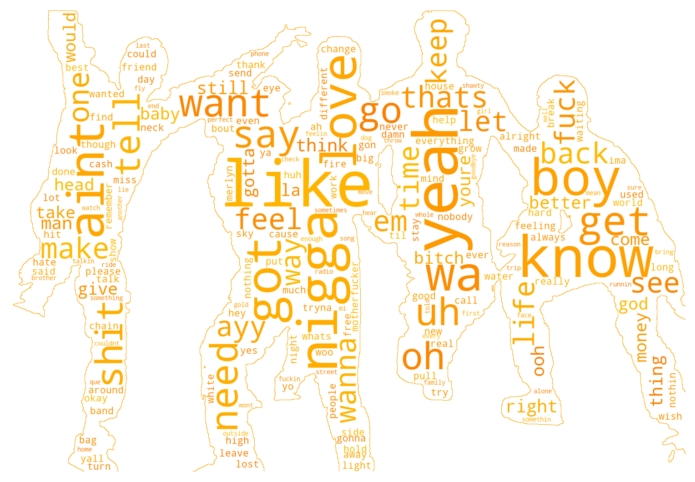

In [7]:
### colormap
# import the desired colormap from matplotlib
cmap = mpl.cm.Wistia(np.linspace(0,1,20)) 
# the darker part of the matrix is selected for readability
cmap = mpl.colors.ListedColormap(cmap[-10:,:-1]) 

# open the image and use np.array to transform the file to an array
cand_mask=np.array(Image.open('brockhampton.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(background_color='white',
                      contour_color='orange',
                      mask=cand_mask, 
                      colormap=cmap,
                      contour_width=0.5).generate_from_frequencies(word_tfidf)


#plot
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()